<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [36]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [37]:
image = np.array(Image.open('/Users/samyu1/Downloads/lemon.jpeg'))

Original Image Shape: (100, 100, 3)
Single Channel Image Shape: (100, 100)


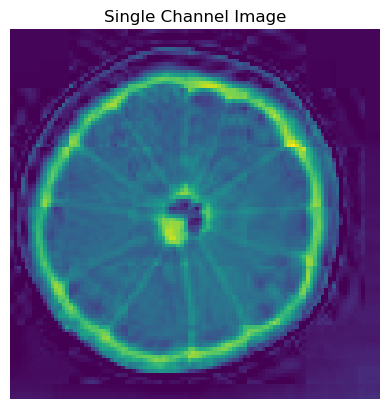

In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image = np.array(Image.open('/Users/samyu1/Downloads/lemon.jpeg'))
print("Original Image Shape:", image.shape)
# Create a new variable img_single_channel that is equivalent to the last color channel of the image
img_single_channel = image[:, :, -1]
# Print the shape of img_single_channel to check that it has the same number of pixels as the original image
print("Single Channel Image Shape:", img_single_channel.shape)
plt.imshow(img_single_channel)  
plt.title('Single Channel Image')
plt.axis('off')  
plt.show()

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Average Channel Image Shape: (100, 100)


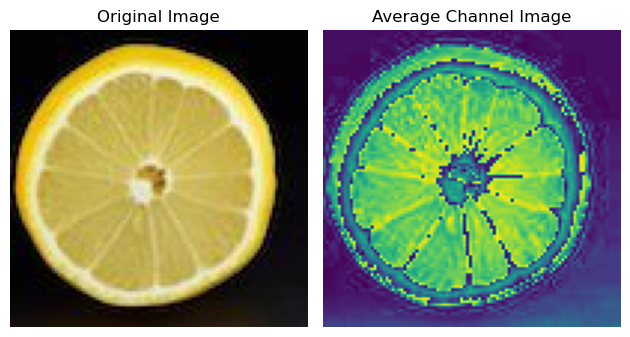

In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image = np.array(Image.open('/Users/samyu1/Downloads/lemon.jpeg'))
img_average_channel = np.mean(image, axis=-1, dtype=np.uint8)
print("Average Channel Image Shape:", img_average_channel.shape)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)  
plt.title('Average Channel Image')
plt.axis('off')
plt.tight_layout()
plt.show()

''' comment on the differences and which one you would say is better

The result of plotting the original image here will display the full-color image with all its original colors and details intact.
In Part 1, the result was a transformation of the original image, 
which might have been altered depending on the specific transformation matrix applied. 
It could be a rotated, scaled, or otherwise transformed version of the original image.'''


## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [40]:
'''1.) An identity matrix is a square matrix with ones on the diagonal and zeros in the remaining position. 
When we multiply any matrix by an identity matrix of the same size, the original matrix remains unchanged. 
It behaves like the number 1 in arithmetic,preserving the value of the matrix it multiplies.'''
import numpy as np
rows, cols = img_average_channel.shape
identity_matrix = np.eye(rows, cols)
random_row = np.random.randint(0, rows)
print("Random Row from Identity Matrix:")
print(identity_matrix[random_row])


Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [41]:
import numpy as np

num_rows = img_average_channel.shape[0]
indices = np.arange(num_rows)
np.random.shuffle(indices)
print("Shuffled Rows:")
print(indices)

Shuffled Rows:
[24 74 86  2  1 87 63 22 48 59 69 94  9 29 41 44 88 95 55  4 93 66 54 37
 13 84 43 35 12 60 42  6 30  0 81 17 15 49 21 10 38 27 51  5  3 90 11 50
 16 80 33 77 32 52 89 23 20 73 19 64 68 36 45 72 25 39 82 98 71 97 53 70
 46 76  8 75 62 56 79 34 18 85 57 83 47 40 31 99 28 92 58 91 67  7 96 65
 26 78 14 61]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [54]:
'''The `T` matrix is formed by reordering the rows of the `identity_matrix` based on a set of random row indices provided in the variable `rows`. 
The resulting matrix `T` retains the same values as the identity matrix but arranges its rows in a specific order as defined by `rows`.
'''
T = identity_matrix[indices]
if T.shape != img_average_channel.shape and identity_matrix :
    T = T[:img_average_channel.shape[0], :img_average_channel.shape[1]]
    print("Reshaped Shape of T:", T.shape)
else:
    print("Shape of T:", T.shape)


Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of Transformed Image: (100, 100)


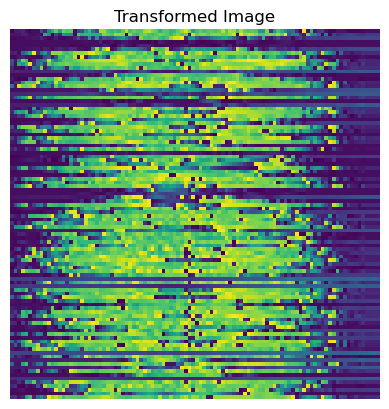

In [47]:
'''The pattern I could see is very scarambled and there is no shape of the lemon could be found .
Matrix multiplication in image processing combines and reshapes pixel values based on the properties encoded in the matrices. 
It can perform operations like rotation, scaling, and more, altering the original image accordingly. 
The exact effect depends on the specific matrices used.'''
transformed_image = np.matmul(T, img_average_channel)
print("Shape of Transformed Image:", transformed_image.shape)
plt.imshow(transformed_image)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

T is invertible.


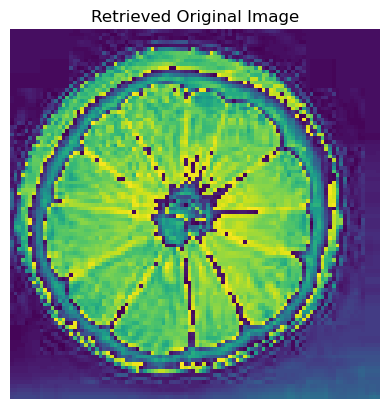

In [55]:
'''To determine if matrix `T` is invertible, we have to check if it is a square matrix and if its determinant is non-zero.
If it meets these criteria, `T` is invertible and to retrieve the original image we use the inverse matrix to reverse the transformation.'''
import numpy as np
if T.shape[0] == T.shape[1]:
    # Compute the determinant of T
    det_T = np.linalg.det(T)
    # Check if the determinant is nonzero, indicating that T is invertible
    if det_T != 0:
        Tinv = np.linalg.inv(T)
        print("T is invertible.")
    else:
        print("T is not invertible (determinant is zero).")
else:
    print("T is not square, so it is not invertible.")
retrieved_image = np.matmul(Tinv, transformed_image)
plt.imshow(retrieved_image)
plt.title('Retrieved Original Image')
plt.axis('off')
plt.show()


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

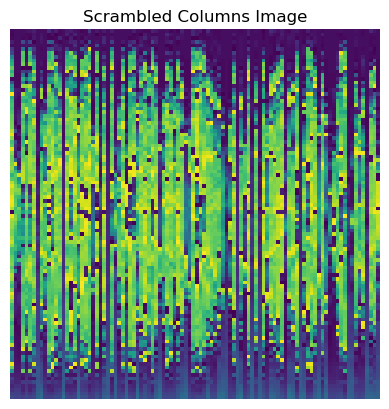

In [45]:
# Transpose the T matrix and img_average_channel
T_transposed = T.T
img_average_channel_transposed = img_average_channel.T
# Matrix multiplication between the transposed T and transposed img_average_channel
transformed_image_columns = np.matmul(T_transposed, img_average_channel_transposed)
# Transpose the result back to the original orientation
transformed_image_columns = transformed_image_columns.T
# Plot the transformed_image_columns to show the scrambled columns
plt.imshow(transformed_image_columns)
plt.title('Scrambled Columns Image')
plt.axis('off')
plt.show()

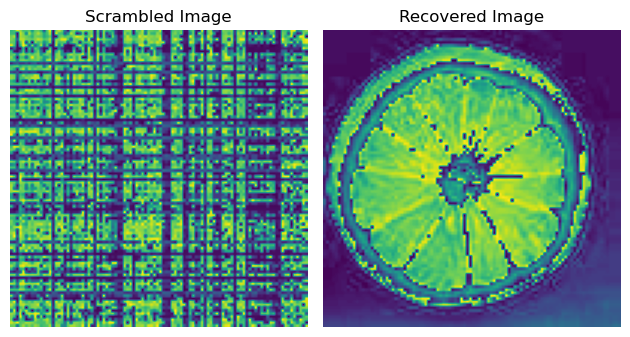

In [46]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image = np.array(Image.open('/Users/samyu1/Downloads/lemon.jpeg'))
img_average_channel = np.mean(image, axis=-1, dtype=np.uint8)
# Create a random shuffling of row and column indices
num_rows, num_cols = img_average_channel.shape
row_indices = np.arange(num_rows)
col_indices = np.arange(num_cols)
np.random.shuffle(row_indices)
np.random.shuffle(col_indices)
# Create the permutation matrices T_rows and T_cols
T_rows = np.eye(num_rows)[row_indices]
T_cols = np.eye(num_cols)[col_indices]
# Scramble both rows and columns of the original image
scrambled_image = np.dot(np.dot(T_rows, img_average_channel), T_cols)
# Invert the scrambling operations
T_rows_inv = np.linalg.inv(T_rows)
T_cols_inv = np.linalg.inv(T_cols)
recovered_image = np.matmul(np.matmul(T_rows_inv, scrambled_image), T_cols_inv)
# Plot the scrambled_image
plt.subplot(1, 2, 1)
plt.imshow(scrambled_image)
plt.title('Scrambled Image')
plt.axis('off')
# Plot the recovered_image
plt.subplot(1, 2, 2)
plt.imshow(recovered_image)
plt.title('Recovered Image')
plt.axis('off')
plt.tight_layout()
plt.show()